In [336]:
# imports all the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score,confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [337]:
# load the dataset by using the pandas 
telco_data= pd.read_excel('Telco_customer_churn.xlsx')
telco_data.head(2)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved


In [338]:
# shape of the dataset
telco_data.shape

(7043, 33)

In [339]:
# check the data types 
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [340]:
telco_data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [341]:
# check the null values 
telco_data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [342]:
# when the use data is drop from dataset then use deep copy to change it
update_telco_cust= telco_data.copy()

In [343]:
update_telco_cust['Gender'].value_counts()

Gender
Male      3555
Female    3488
Name: count, dtype: int64

In [344]:
# In the column of churn reason is contain the null values then is drop all 
# update_telco_cust.drop(columns='Churn Reason',inplace=True)

In [345]:
# check the null values in dataset
update_telco_cust.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [346]:
# check the number of customer who belong to the which country
update_telco_cust['Country'].value_counts()

Country
United States    7043
Name: count, dtype: int64

In [347]:
# check the how many state for how many customer belong which
update_telco_cust['State'].value_counts()

State
California    7043
Name: count, dtype: int64

In [348]:
# check customer have same zip code
update_telco_cust.groupby('CustomerID')['Zip Code'].value_counts()

CustomerID  Zip Code
0002-ORFBO  93225       1
0003-MKNFE  91206       1
0004-TLHLJ  92627       1
0011-IGKFF  94553       1
0013-EXCHZ  93010       1
                       ..
9987-LUTYD  91941       1
9992-RRAMN  95367       1
9992-UJOEL  95432       1
9993-LHIEB  92075       1
9995-HOTOH  96125       1
Name: count, Length: 7043, dtype: int64

In [349]:
update_telco_cust.groupby('Gender')['Zip Code'].value_counts()

Gender  Zip Code
Female  90071       5
        90402       5
        90602       5
        90620       5
        90810       5
                   ..
Male    96113       1
        96117       1
        96124       1
        96137       1
        96148       1
Name: count, Length: 3121, dtype: int64

In [350]:
# check how many of gender is senior citizen
update_telco_cust.groupby('Gender')['Senior Citizen'].value_counts().to_frame()


count
Gender Senior Citizen       
Female No               2920
       Yes               568
Male   No               2981
       Yes               574

In [351]:
# check how many gender have partner
update_telco_cust.groupby('Gender')['Partner'].value_counts().to_frame()

count
Gender Partner       
Female No        1800
       Yes       1688
Male   No        1841
       Yes       1714

In [352]:
# check how many Gender have depedents
update_telco_cust.groupby('Gender')['Dependents'].value_counts().to_frame()

count
Gender Dependents       
Female No           2690
       Yes           798
Male   No           2726
       Yes           829

In [353]:
# check how many gender have phone services
update_telco_cust.groupby('Gender')['Phone Service'].value_counts().to_frame()

count
Gender Phone Service       
Female Yes             3157
       No               331
Male   Yes             3204
       No               351

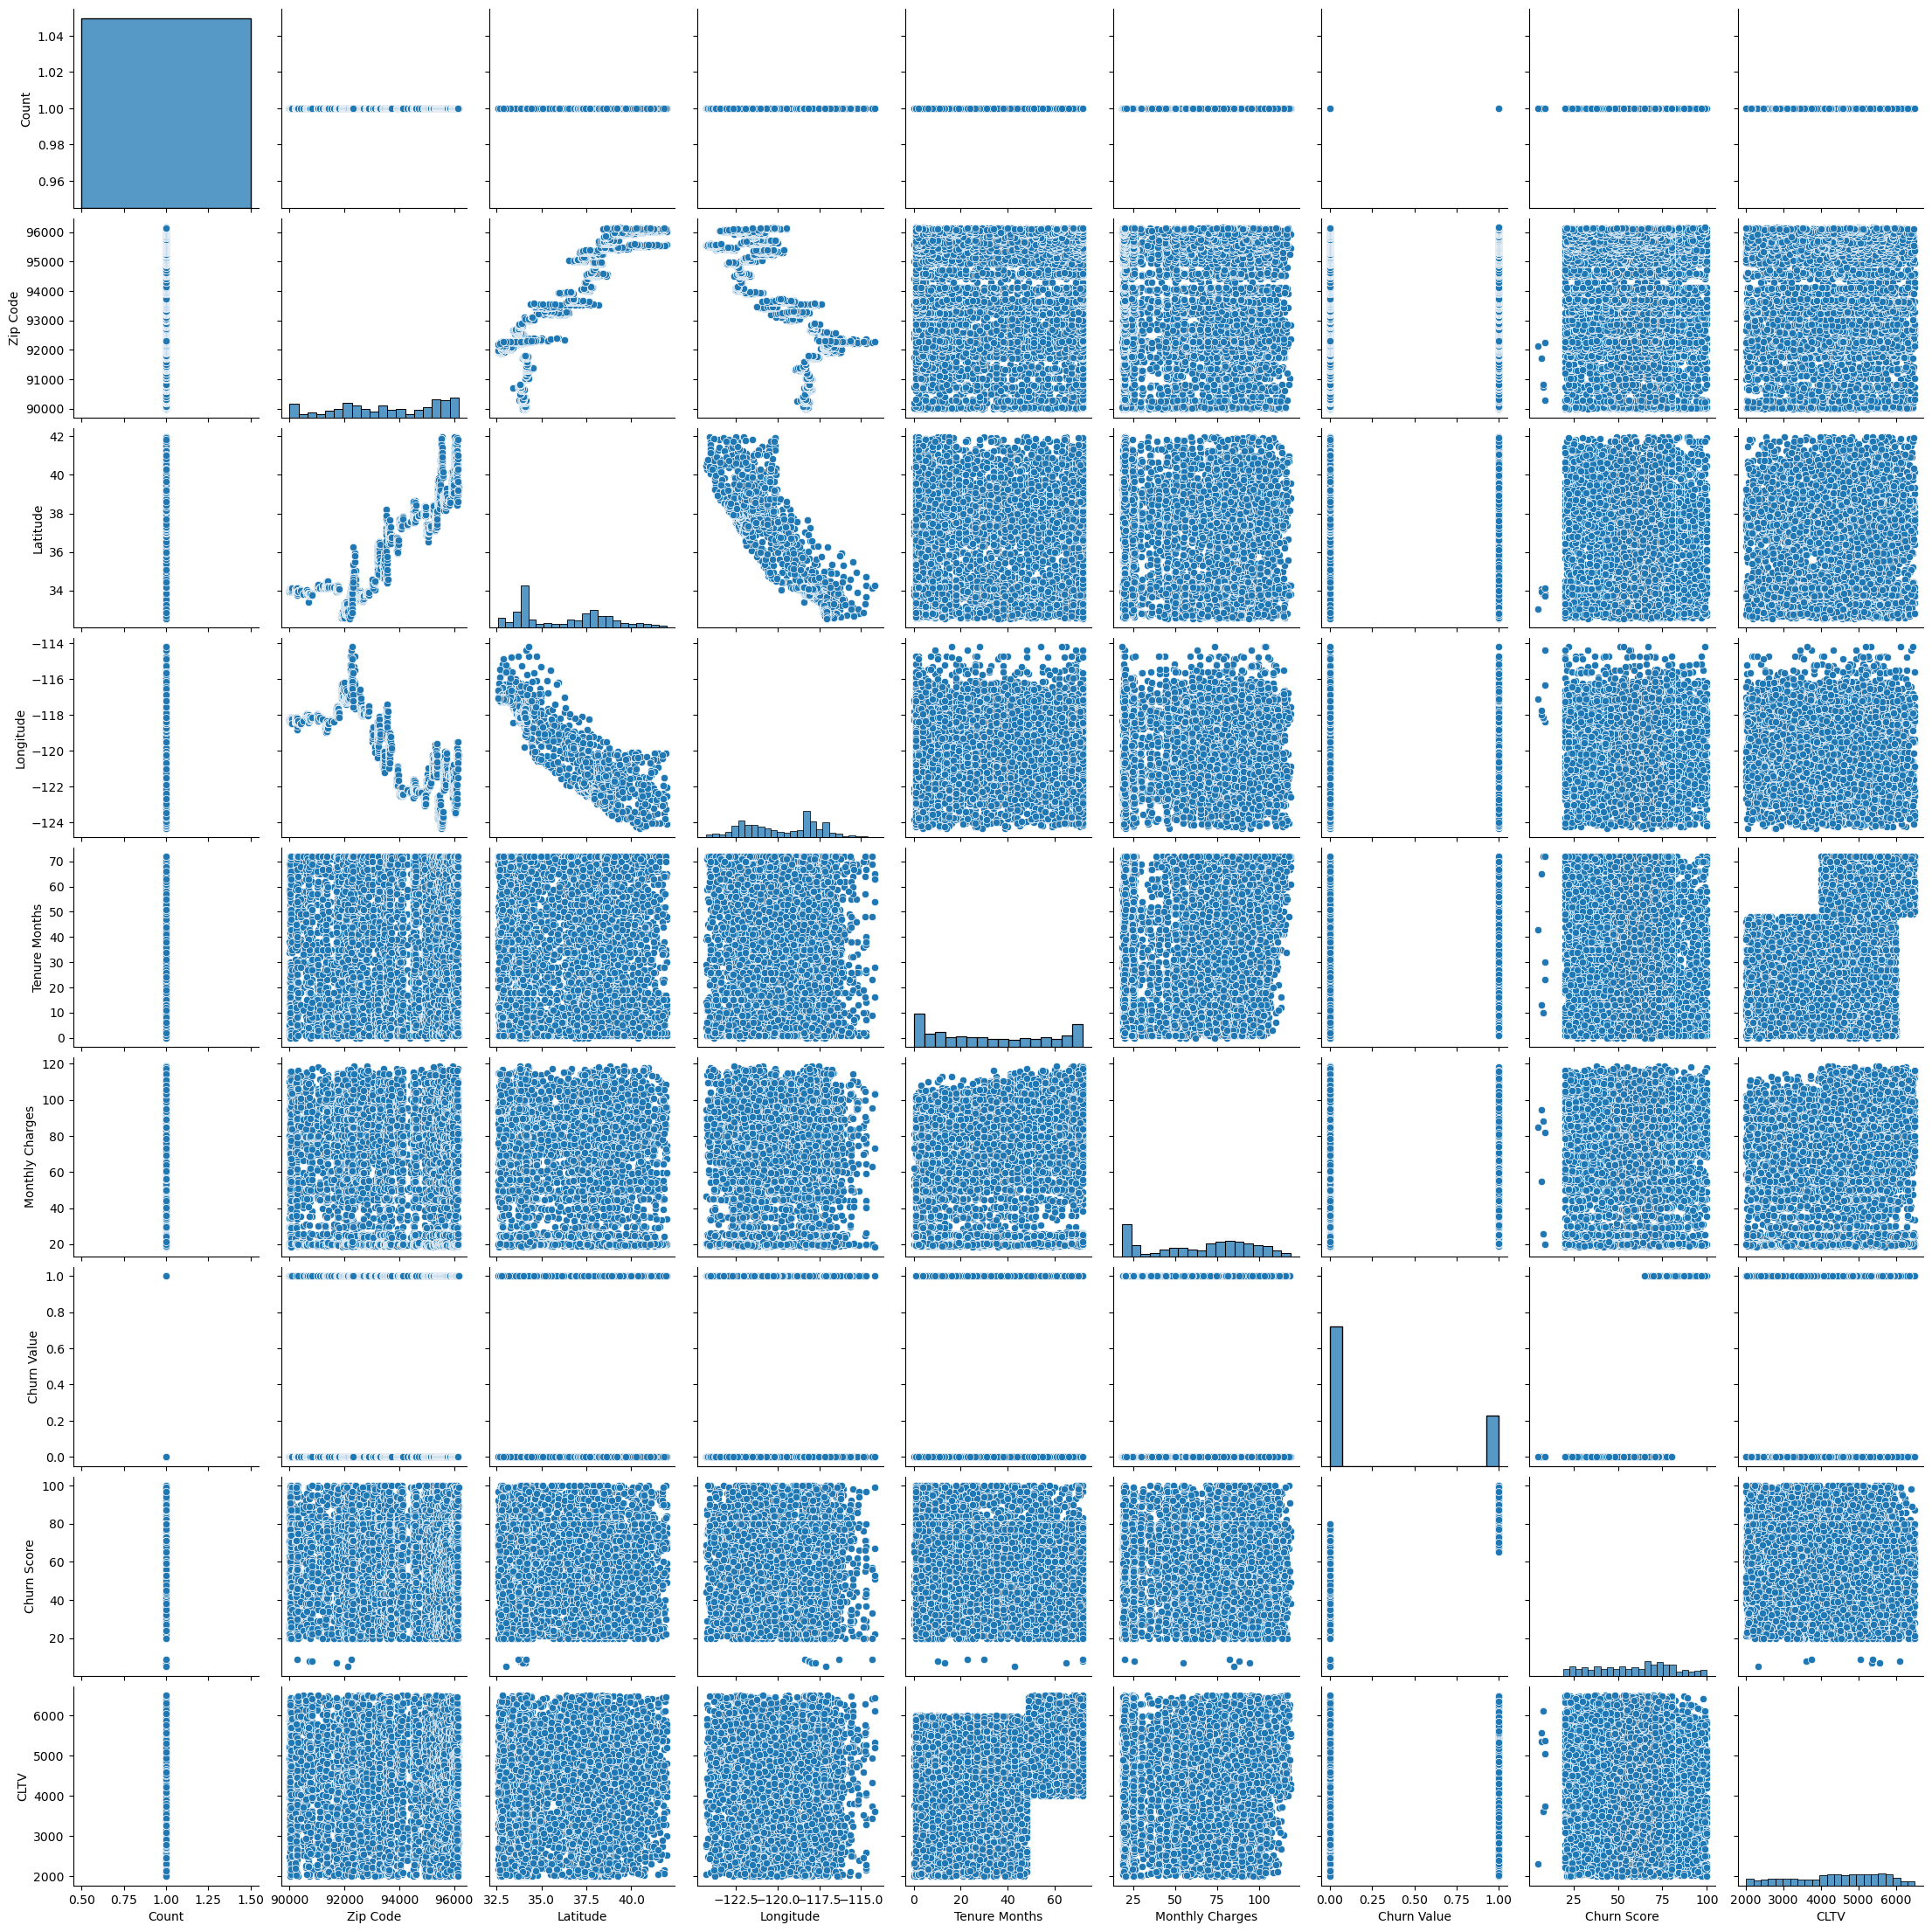

In [354]:
sns.pairplot(data=update_telco_cust)
plt.show()

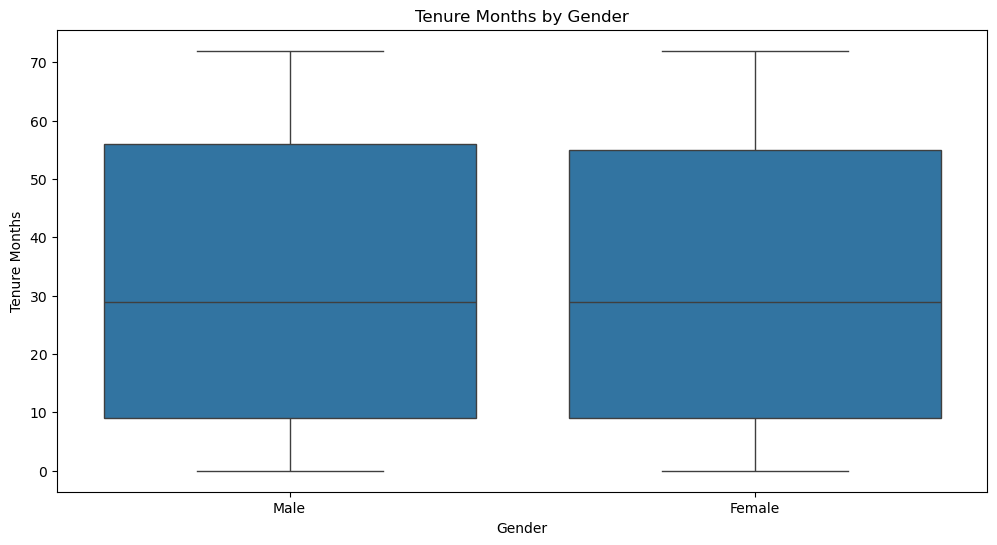

In [355]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Gender', y='Tenure Months', data=update_telco_cust)
plt.title('Tenure Months by Gender')
plt.show()

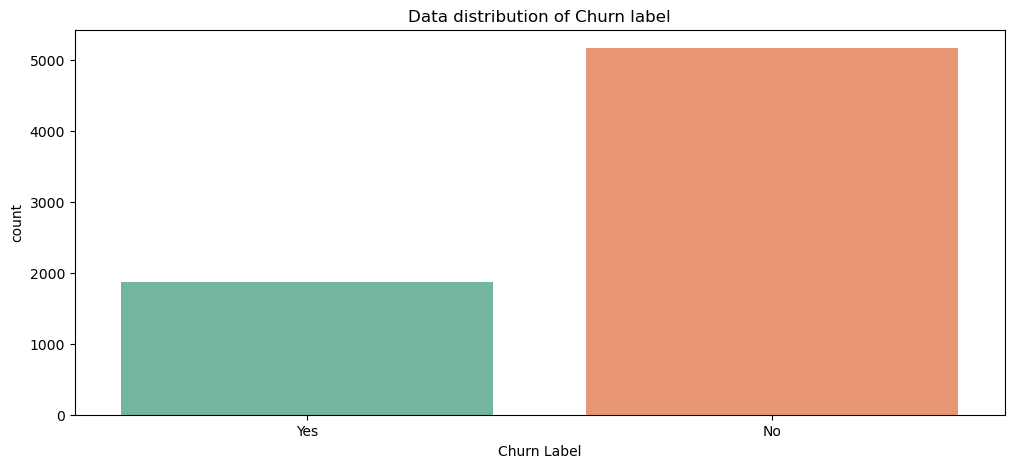

In [356]:
plt.subplots(figsize=(12,5))
sns.countplot(data=update_telco_cust,x='Churn Label',hue='Churn Label', palette='Set2')
plt.title('Data distribution of Churn label')

plt.show()

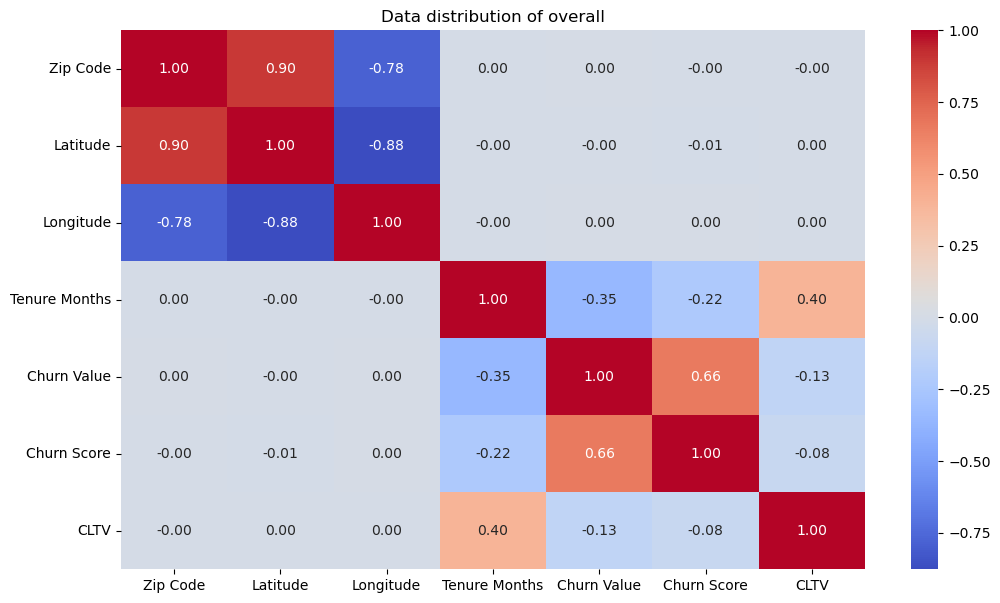

In [357]:
plt.subplots(figsize=(12,7))
cols= ['Zip Code','Latitude', 'Longitude','Tenure Months','Churn Value','Churn Score','CLTV' ]
sns.heatmap(data=update_telco_cust[cols].corr(), annot=True,cmap='coolwarm', fmt=".2f")
plt.title('Data distribution of overall')
plt.show()

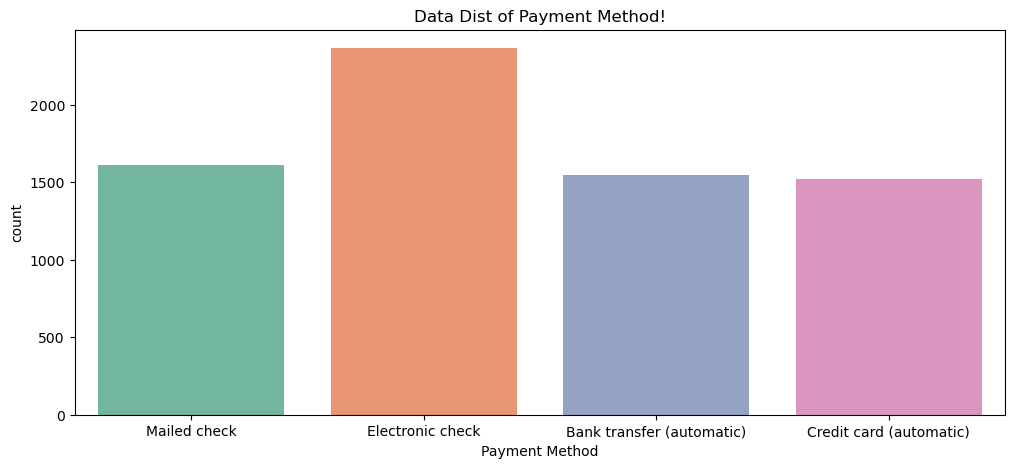

In [358]:
plt.subplots(figsize=(12,5))
sns.countplot(data=update_telco_cust,x='Payment Method',hue='Payment Method',palette='Set2')
plt.title('Data Dist of Payment Method!')
plt.show()

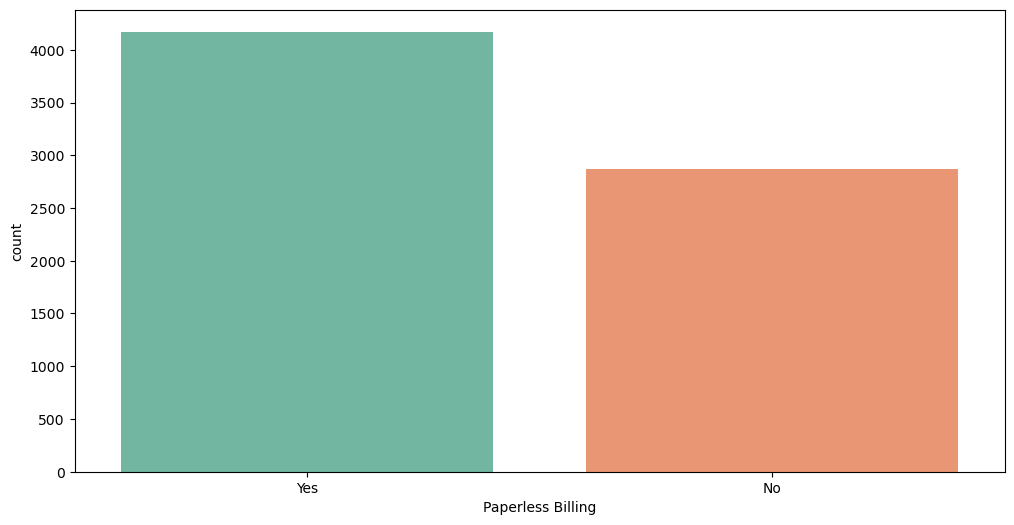

In [359]:
plt.subplots(figsize=(12,6))
sns.countplot(data=update_telco_cust, x='Paperless Billing', hue='Paperless Billing', palette='Set2')
plt.show()

In [360]:
update_telco_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [361]:
update_telco_cust['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [381]:
# Convert Total Charges to numeric, handling blank spaces
update_telco_cust['Total Charges'] = pd.to_numeric(update_telco_cust['Total Charges'], errors='coerce')
update_telco_cust['Total Charges'] = update_telco_cust['Total Charges'].fillna(update_telco_cust['Total Charges'].median())

In [382]:
# Drop irrelevant columns and features that cause data leakage
drop_cols = [
    'CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 
    'Lat Long', 'Latitude', 'Longitude', 'Churn Value', 'Churn Score', 'Churn Reason'
]

In [383]:
# split the dataset into dependent and independent, assign the data who is relevent and irrelevent
X=update_telco_cust.drop(columns=['Churn Label'] + drop_cols,axis=1)
y=update_telco_cust['Churn Label'].map({'Yes': 1, 'No': 0})

In [385]:
# separated the columns of objects and numericals  
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

In [386]:
# use the pipeline
model= Pipeline(steps=[
    ('pre', preprocessor),
    ('log', LogisticRegression(max_iter=100))
])

In [387]:
# use the pipeline with Random Forest Classifier
from sklearn.pipeline import Pipeline
model_data=Pipeline(steps=[
    ('pre', preprocessor),
    ('random', RandomForestClassifier(n_estimators=100,random_state=42))
])

In [388]:
# use the pipeline with Decision Forest Classifier
from sklearn.tree import DecisionTreeClassifier
model_dtc= Pipeline(steps=[
    ('pre', preprocessor),
    ('dtc', DecisionTreeClassifier(max_depth=5,random_state=42))
])

In [415]:
# use for the find better recall value for class 1 that's use
scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])

In [416]:
# use the pipeline with Xgboost implementation 
model_xgb= Pipeline(steps=[
    ('pre', preprocessor),
    ('xgb', XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight
    ))
])

In [417]:
# Spliting the into the parts for train and test and validation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [418]:
X_train.shape, X_test.shape
X_train.columns[:10]
y_test.value_counts()

Churn Label
0    1048
1     361
Name: count, dtype: int64

In [419]:
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1048
           1       0.63      0.57      0.60       361

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.80      0.80      0.80      1409



In [420]:
model_data.fit(X_train, y_train)

y_pred_rfc = model_data.predict(X_test)

print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1048
           1       0.65      0.50      0.57       361

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.80      1409



In [421]:
model_dtc.fit(X_train, y_train)
y_pred_dtc= model_dtc.predict(X_test)

print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1048
           1       0.58      0.65      0.61       361

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.80      0.79      0.79      1409



In [422]:
model_xgb.fit(X_train, y_train)
model_pred_xgb= model_xgb.predict(X_test)

print(classification_report(y_test, model_pred_xgb))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1048
           1       0.55      0.65      0.60       361

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.79      0.77      0.78      1409



/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:04:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [398]:
# model accuracy score in Decision Tree Classifier
from sklearn.metrics import accuracy_score

print("Train Accuracy:", accuracy_score(y_train, model_dtc.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, model_dtc.predict(X_test)))

Train Accuracy: 0.8015619453319134
Test Accuracy: 0.7906316536550745


In [399]:
# Check the accuracy in the Random forest classifier
print("Train Accuracy:", accuracy_score(y_train, model_data.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, model_data.predict(X_test)))

Train Accuracy: 1.0
Test Accuracy: 0.8048261178140526


In [378]:
# Check the accuracy in the Logistic Regression

print("Train Accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Train Accuracy: 0.8148739794107206
Test Accuracy: 0.8041163946061036


In [407]:
# Check the accuracy in the XGBOOST Classifier

print("Train Accuracy:", accuracy_score(y_train, model_xgb.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, model_xgb.predict(X_test)))

Train Accuracy: 0.9611288604898829
Test Accuracy: 0.78708303761533


In [400]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

ROC-AUC: 0.8465881457359752


In [403]:
# Get feature names after encoding
feature_names = model_data.named_steps['pre'].get_feature_names_out()

importances = model_data.named_steps['random'].feature_importances_

feat_imp = pd.Series(importances, index=feature_names)
top5 = feat_imp.sort_values(ascending=False).head(5)

print("Top 5 Important Features:")
print(top5)

Top 5 Important Features:
num__Total Charges              0.128673
num__Tenure Months              0.114892
num__Monthly Charges            0.106881
num__CLTV                       0.104785
cat__Contract_Month-to-month    0.052451
dtype: float64
